In [2]:
import requests
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
import psycopg2

In [3]:
#data 1
r = requests.get("https://www.fema.gov/api/open/v1/FemaWebDisasterDeclarations")

json_data = json.loads(r.content.decode("utf-8"))
json_data


{'metadata': {'skip': 0,
  'top': 1000,
  'count': 0,
  'filter': '',
  'format': 'json',
  'metadata': True,
  'select': None,
  'entityname': 'FemaWebDisasterDeclarations',
  'version': 'v1',
  'url': '/api/open/v1/FemaWebDisasterDeclarations',
  'rundate': '2022-04-14T16:35:57.935Z'},
 'FemaWebDisasterDeclarations': [{'disasterNumber': 3397,
   'declarationDate': '2018-02-11T00:00:00.000Z',
   'disasterName': 'TROPICAL STORM GITA',
   'incidentBeginDate': '2018-02-07T00:00:00.000Z',
   'incidentEndDate': '2018-02-12T00:00:00.000Z',
   'declarationType': 'Emergency',
   'stateCode': 'AS',
   'stateName': 'American Samoa',
   'incidentType': 'Hurricane',
   'entryDate': '2018-02-11T00:00:00.000Z',
   'updateDate': '2018-09-26T00:00:00.000Z',
   'closeoutDate': None,
   'hash': '0d548a11763653005b93ff0697cacdc6bc9c9cce',
   'lastRefresh': '2021-07-13T23:01:15.083Z',
   'id': '5aa2d570cb4f0f7020b1703a'},
  {'disasterNumber': 3390,
   'declarationDate': '2017-09-18T00:00:00.000Z',
   'di

## Parameters used:
### Declaration Type -One of "DR" (= major disaster), "EM" (= emergency management), or "FM" (= "fire management")
### fyDeclared - Fiscal year in which the disaster was declared
### disasterNumber - Number of disasters happened in the state for particular year
### state- State in US
### incidentType- Type of disaster


In [7]:
#data 1
r = requests.get("https://www.fema.gov/api/open/v1/FemaWebDisasterDeclarations")

json_data = json.loads(r.content.decode("utf-8"))
json_data



{'metadata': {'skip': 0,
  'top': 1000,
  'count': 0,
  'filter': '',
  'format': 'json',
  'metadata': True,
  'select': None,
  'entityname': 'FemaWebDisasterDeclarations',
  'version': 'v1',
  'url': '/api/open/v1/FemaWebDisasterDeclarations',
  'rundate': '2022-04-14T07:24:51.598Z'},
 'FemaWebDisasterDeclarations': [{'disasterNumber': 3397,
   'declarationDate': '2018-02-11T00:00:00.000Z',
   'disasterName': 'TROPICAL STORM GITA',
   'incidentBeginDate': '2018-02-07T00:00:00.000Z',
   'incidentEndDate': '2018-02-12T00:00:00.000Z',
   'declarationType': 'Emergency',
   'stateCode': 'AS',
   'stateName': 'American Samoa',
   'incidentType': 'Hurricane',
   'entryDate': '2018-02-11T00:00:00.000Z',
   'updateDate': '2018-09-26T00:00:00.000Z',
   'closeoutDate': None,
   'hash': '0d548a11763653005b93ff0697cacdc6bc9c9cce',
   'lastRefresh': '2021-07-13T23:01:15.083Z',
   'id': '5aa2d570cb4f0f7020b1703a'},
  {'disasterNumber': 3390,
   'declarationDate': '2017-09-18T00:00:00.000Z',
   'di

In [49]:
df = pd.json_normalize(json_data["FemaWebDisasterDeclarations"])

In [50]:
df.head(10)

,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,hash,lastRefresh,id
0,3397,2018-02-11T00:00:00.000Z,TROPICAL STORM GITA,2018-02-07T00:00:00.000Z,2018-02-12T00:00:00.000Z,Emergency,AS,American Samoa,Hurricane,2018-02-11T00:00:00.000Z,2018-09-26T00:00:00.000Z,None,0d548a11763653005b93ff0697cacdc6bc9c9cce,2021-07-13T23:01:15.083Z,5aa2d570cb4f0f7020b1703a
1,3390,2017-09-18T00:00:00.000Z,HURRICANE MARIA,2017-09-16T00:00:00.000Z,2017-09-22T00:00:00.000Z,Emergency,VI,Virgin Islands of the U.S.,Hurricane,2017-09-18T00:00:00.000Z,2018-09-07T00:00:00.000Z,2018-09-07T00:00:00.000Z,2f759fed8f206694f47538ffda1be535c6aa234f,2021-07-13T23:01:15.162Z,5aa2d570cb4f0f7020b1703f
2,4352,2017-12-20T00:00:00.000Z,SEVERE STORMS AND FLOODING,2017-10-04T00:00:00.000Z,2017-10-06T00:00:00.000Z,Major Disaster,NM,New Mexico,Flood,2017-12-21T00:00:00.000Z,2017-12-21T00:00:00.000Z,None,9426023f5a3c2be37671a5bb498848756552c2a4,2021-07-13T23:01:15.087Z,5aa2d570cb4f0f7020b1703b
3,3388,2017-09-08T00:00:00.000Z,HURRICANE IRMA,2017-09-04T00:00:00.000Z,2017-10-04T00:00:00.000Z,Emergency,FL,Florida,Hurricane,2017-09-09T00:00:00.000Z,2018-04-03T00:00:00.000Z,2018-03-28T00:00:00.000Z,0302a9f6b2dcbec3c243c6f03807b733d263983f,2021-07-13T23:01:15.173Z,5aa2d570cb4f0f7020b17040
4,3395,2017-10-08T00:00:00.000Z,HURRICANE NATE,2017-10-07T00:00:00.000Z,2017-10-11T00:00:00.000Z,Emergency,FL,Florida,Hurricane,2017-10-08T00:00:00.000Z,2017-10-13T00:00:00.000Z,None,8e70993c0499f478a5db4b69e761d53db128ea87,2021-07-13T23:01:15.114Z,5aa2d570cb4f0f7020b1703d
5,3392,2017-10-06T00:00:00.000Z,TROPICAL STORM NATE,2017-10-05T00:00:00.000Z,2017-10-08T00:00:00.000Z,Emergency,LA,Louisiana,Hurricane,2017-10-06T00:00:00.000Z,2017-10-13T00:00:00.000Z,None,df6da42bd45d0819eb850e937f551d08826f0e75,2021-07-13T23:01:15.154Z,5aa2d570cb4f0f7020b1703e
6,4332,2017-08-25T00:00:00.000Z,HURRICANE HARVEY,2017-08-23T00:00:00.000Z,2017-09-15T00:00:00.000Z,Major Disaster,TX,Texas,Hurricane,2017-08-26T00:00:00.000Z,2017-09-15T00:00:00.000Z,None,b5216b615cad6f6ba24751905d0b9d9c6b33fc68,2021-07-13T23:01:15.187Z,5aa2d570cb4f0f7020b17042
7,4348,2017-11-14T00:00:00.000Z,FLOODING,2017-05-02T00:00:00.000Z,2017-08-06T00:00:00.000Z,Major Disaster,NY,New York,Flood,2017-11-14T00:00:00.000Z,2017-11-14T00:00:00.000Z,None,d89a6c4e2b158cb462f414edb73991285f8b47fd,2021-07-13T23:01:15.097Z,5aa2d570cb4f0f7020b1703c
8,3384,2017-09-05T00:00:00.000Z,HURRICANE IRMA,2017-09-05T00:00:00.000Z,2017-09-07T00:00:00.000Z,Emergency,PR,Puerto Rico,Hurricane,2017-09-06T00:00:00.000Z,2017-09-18T00:00:00.000Z,None,7381db2d356a86658ab0562d051849619d413f8a,2021-07-13T23:01:15.177Z,5aa2d570cb4f0f7020b17041
9,4327,2017-08-05T00:00:00.000Z,FLOODING,2017-06-07T00:00:00.000Z,2017-06-22T00:00:00.000Z,Major Disaster,WY,Wyoming,Flood,2017-08-06T00:00:00.000Z,2017-08-06T00:00:00.000Z,None,e96f3b1cd09ff58f7c341c878adcbcce10f2e57e,2021-07-13T23:01:15.196Z,5aa2d570cb4f0f7020b17043


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   disasterNumber     1000 non-null   int64 
 1   declarationDate    1000 non-null   object
 2   disasterName       1000 non-null   object
 3   incidentBeginDate  1000 non-null   object
 4   incidentEndDate    949 non-null    object
 5   declarationType    1000 non-null   object
 6   stateCode          1000 non-null   object
 7   stateName          1000 non-null   object
 8   incidentType       1000 non-null   object
 9   entryDate          1000 non-null   object
 10  updateDate         1000 non-null   object
 11  closeoutDate       719 non-null    object
 12  hash               1000 non-null   object
 13  lastRefresh        1000 non-null   object
 14  id                 1000 non-null   object
dtypes: int64(1), object(14)
memory usage: 117.3+ KB


In [81]:
def get_connection(db = "postgres"):
    
    connection = psycopg2.connect(
        user = "postgres",
        password = "Hsbc@2016",
        host = "localhost",
        port = "5432",
        database = db)
    
    #connection.set_isolation_level(0) # AUTOCOMMIT
    
    return connection
db = "test"
conn = get_connection()
cursor = conn.cursor()
conn.autocommit 

In [73]:
def read_database_version():
    try:
        connection = get_connection()
        cursor = connection.cursor()
        
        cursor.execute("SELECT version();")
        db_version = cursor.fetchone()
        
        print("You are connected to PostgreSQL version: ", db_version)
     
    except (Exception, psycopg2.Error) as error:
        print("Error while getting data", error)
    finally:
        if(connection): 
            connection.close()

### create the database

In [82]:
#creating the database

def create_database(db):
    try:
        connection = get_connection()

        # "CREATE DATABASE" requires automatic commits
        connection.autocommit = True

        #cursor - structure that enables traversal over the records in a database
        cursor = connection.cursor()

        #Droping database MYDATABASE if already exists.
        cursor.execute(f"DROP database IF EXISTS {db} WITH (FORCE);")
                
        #creating a database
        sql = f"CREATE database {db}"
        cursor.execute(sql)

        cursor.close()
        
    except (Exception, psycopg2.Error) as error:
        print("Error while getting data", error)

    finally:
        if connection is not None:
            connection.close()

In [83]:
db = 'df'
print("Question 2: Create Database")
create_database(db)

Question 2: Create Database


UnboundLocalError: local variable 'connection' referenced before assignment

In [53]:
# value_counts returns a series of unique value counts in descending order
disaster_types = df['incidentType'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incidentType'].value_counts())

Types of Disasters reported:

 ['Hurricane' 'Flood' 'Severe Storm(s)' 'Fire' 'Snow' 'Dam/Levee Break'
 'Tornado' 'Severe Ice Storm' 'Coastal Storm' 'Mud/Landslide'
 'Toxic Substances' 'Typhoon' 'Volcano' 'Earthquake' 'Chemical'
 'Terrorist' 'Other' 'Freezing' 'Tsunami']
Occurrences:

 Severe Storm(s)     380
Fire                289
Hurricane           120
Flood               112
Snow                 32
Severe Ice Storm     28
Tornado              13
Earthquake            5
Mud/Landslide         4
Other                 4
Tsunami               3
Coastal Storm         2
Typhoon               2
Volcano               1
Terrorist             1
Dam/Levee Break       1
Freezing              1
Toxic Substances      1
Chemical              1
Name: incidentType, dtype: int64


In [75]:
# reset index - new sequential index is used such as 0,1,2,3,4.....
m=df['declarationDate'].value_counts().reset_index()
m

,index,declarationDate
0,2009-04-10T00:00:00.000Z,11
1,2012-10-28T00:00:00.000Z,6
2,2011-09-03T00:00:00.000Z,6
3,2011-08-27T00:00:00.000Z,5
4,2011-08-31T00:00:00.000Z,5
...,...,...
718,2012-07-06T00:00:00.000Z,1
719,2008-08-14T00:00:00.000Z,1
720,2014-07-23T00:00:00.000Z,1
721,2013-11-08T00:00:00.000Z,1


### to check which states is prone to which disasters

In [57]:
m=df[['stateName','incidentType']].groupby('stateName').describe()
m['incidentType'].sort_values(by='count',ascending=False)

,count,unique,top,freq
stateName,,,,
Texas,111,5,Fire,95
Oklahoma,70,6,Fire,39
California,64,6,Fire,52
New Mexico,30,3,Fire,18
Washington,24,4,Fire,12
Missouri,23,3,Severe Storm(s),15
Iowa,22,3,Severe Storm(s),16
Kansas,21,5,Severe Storm(s),15
Mississippi,21,4,Severe Storm(s),10


### Top 10 State with maximum risk 

In [58]:
p = df[['stateName','incidentType']].groupby('stateName').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incidentType',ascending=False).head(10)
p

,stateName,incidentType
47,Texas,111
39,Oklahoma,70
5,California,64
33,New Mexico,30
52,Washington,24
27,Missouri,23
17,Iowa,22
18,Kansas,21
26,Mississippi,21
45,South Dakota,21


### Ploting Disasater Per state

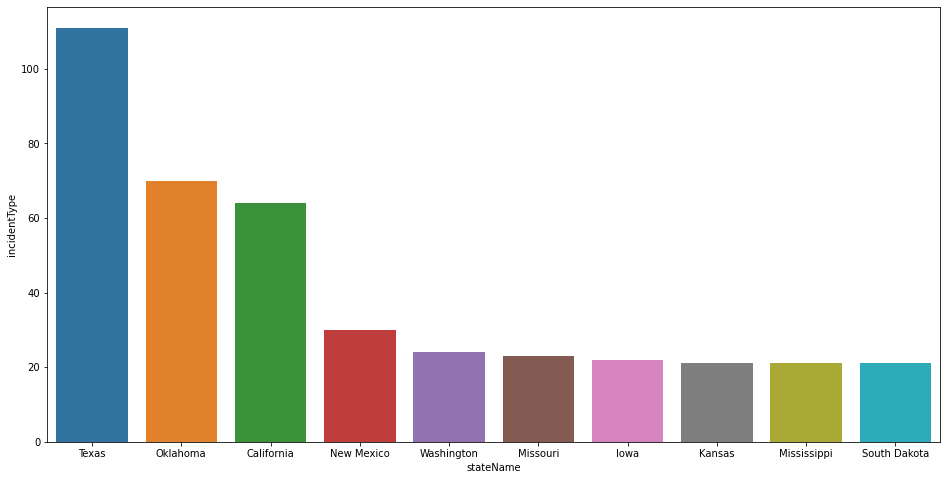

In [59]:
plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="stateName", y="incidentType", data=p,);

### Texas  seems to be most disaster prone state, so exploring more about Oklahoma  

In [61]:
print("Texas mostly faces:\n")
df[['stateName','incidentType']].groupby('stateName').max().loc['Texas']

Texas mostly faces:



incidentType    Severe Storm(s)
Name: Texas, dtype: object

### Texas disasters that happened over time

In [70]:
m=df.query('stateName=="Texas"')['declarationDate'].value_counts().reset_index()
m.head(20)

,index,declarationDate
0,2009-04-10T00:00:00.000Z,6
1,2011-04-15T00:00:00.000Z,4
2,2011-09-06T00:00:00.000Z,4
3,2011-04-16T00:00:00.000Z,3
4,2011-05-29T00:00:00.000Z,3
5,2011-02-27T00:00:00.000Z,3
6,2011-04-09T00:00:00.000Z,3
7,2011-06-20T00:00:00.000Z,3
8,2011-06-21T00:00:00.000Z,2
9,2008-02-25T00:00:00.000Z,2


### 2009 and 2011 were the worst year in Texas

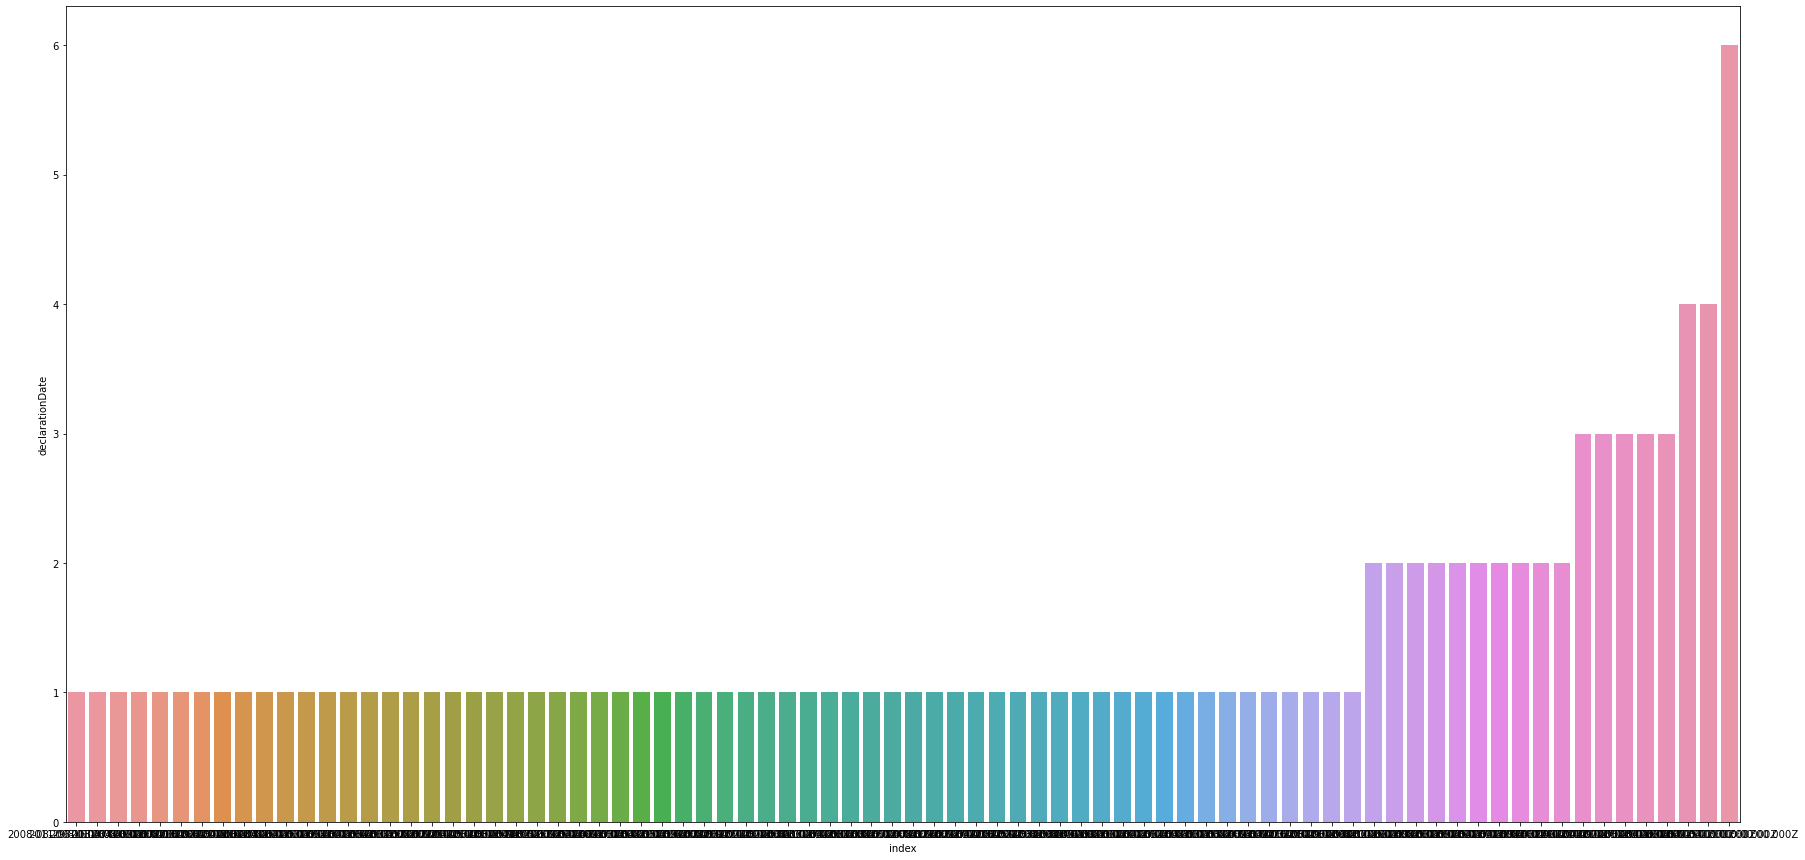

In [74]:
plt.pyplot.figure(figsize=(30,15))
sns.barplot(x='index',y='declarationDate',data=m.sort_values(by='declarationDate'));

### from above figure it shows that disasters has increased over years.

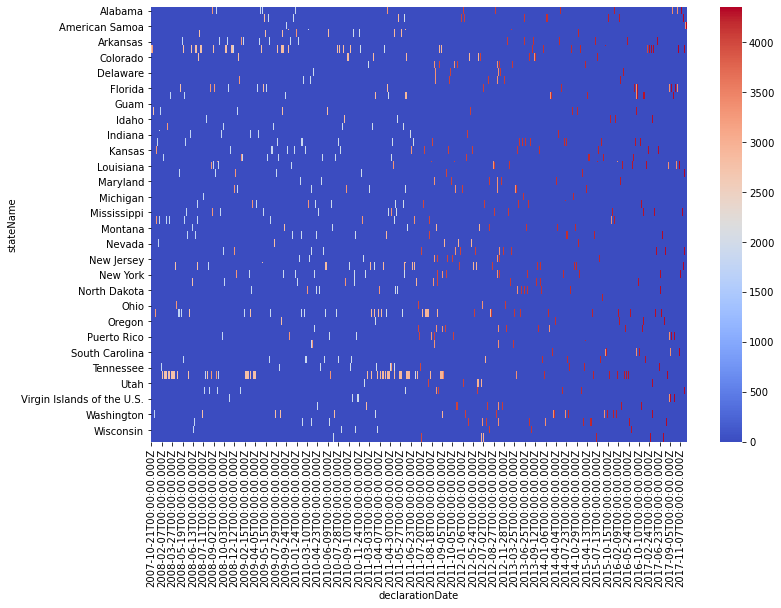

In [73]:
pt = df.pivot_table(values ='disasterNumber', index = 'stateName', columns = 'declarationDate').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm');
plt.pyplot.savefig('heatmap.png')

## Beginning of Project

In [26]:
import requests
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
import psycopg2

In [93]:
#data 1
r = requests.get("https://www.fema.gov/api/open/v1/FemaWebDisasterDeclarations")

json_data = json.loads(r.content.decode("utf-8"))
json_data


{'metadata': {'skip': 0,
  'top': 1000,
  'count': 0,
  'filter': '',
  'format': 'json',
  'metadata': True,
  'select': None,
  'entityname': 'FemaWebDisasterDeclarations',
  'version': 'v1',
  'url': '/api/open/v1/FemaWebDisasterDeclarations',
  'rundate': '2022-04-14T18:17:55.815Z'},
 'FemaWebDisasterDeclarations': [{'disasterNumber': 3397,
   'declarationDate': '2018-02-11T00:00:00.000Z',
   'disasterName': 'TROPICAL STORM GITA',
   'incidentBeginDate': '2018-02-07T00:00:00.000Z',
   'incidentEndDate': '2018-02-12T00:00:00.000Z',
   'declarationType': 'Emergency',
   'stateCode': 'AS',
   'stateName': 'American Samoa',
   'incidentType': 'Hurricane',
   'entryDate': '2018-02-11T00:00:00.000Z',
   'updateDate': '2018-09-26T00:00:00.000Z',
   'closeoutDate': None,
   'hash': '0d548a11763653005b93ff0697cacdc6bc9c9cce',
   'lastRefresh': '2021-07-13T23:01:15.083Z',
   'id': '5aa2d570cb4f0f7020b1703a'},
  {'disasterNumber': 3390,
   'declarationDate': '2017-09-18T00:00:00.000Z',
   'di

In [94]:
df = pd.json_normalize(json_data["FemaWebDisasterDeclarations"],max_level=0)
df.head(10)

,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,updateDate,closeoutDate,hash,lastRefresh,id
0,3397,2018-02-11T00:00:00.000Z,TROPICAL STORM GITA,2018-02-07T00:00:00.000Z,2018-02-12T00:00:00.000Z,Emergency,AS,American Samoa,Hurricane,2018-02-11T00:00:00.000Z,2018-09-26T00:00:00.000Z,None,0d548a11763653005b93ff0697cacdc6bc9c9cce,2021-07-13T23:01:15.083Z,5aa2d570cb4f0f7020b1703a
1,3390,2017-09-18T00:00:00.000Z,HURRICANE MARIA,2017-09-16T00:00:00.000Z,2017-09-22T00:00:00.000Z,Emergency,VI,Virgin Islands of the U.S.,Hurricane,2017-09-18T00:00:00.000Z,2018-09-07T00:00:00.000Z,2018-09-07T00:00:00.000Z,2f759fed8f206694f47538ffda1be535c6aa234f,2021-07-13T23:01:15.162Z,5aa2d570cb4f0f7020b1703f
2,4352,2017-12-20T00:00:00.000Z,SEVERE STORMS AND FLOODING,2017-10-04T00:00:00.000Z,2017-10-06T00:00:00.000Z,Major Disaster,NM,New Mexico,Flood,2017-12-21T00:00:00.000Z,2017-12-21T00:00:00.000Z,None,9426023f5a3c2be37671a5bb498848756552c2a4,2021-07-13T23:01:15.087Z,5aa2d570cb4f0f7020b1703b
3,3388,2017-09-08T00:00:00.000Z,HURRICANE IRMA,2017-09-04T00:00:00.000Z,2017-10-04T00:00:00.000Z,Emergency,FL,Florida,Hurricane,2017-09-09T00:00:00.000Z,2018-04-03T00:00:00.000Z,2018-03-28T00:00:00.000Z,0302a9f6b2dcbec3c243c6f03807b733d263983f,2021-07-13T23:01:15.173Z,5aa2d570cb4f0f7020b17040
4,3395,2017-10-08T00:00:00.000Z,HURRICANE NATE,2017-10-07T00:00:00.000Z,2017-10-11T00:00:00.000Z,Emergency,FL,Florida,Hurricane,2017-10-08T00:00:00.000Z,2017-10-13T00:00:00.000Z,None,8e70993c0499f478a5db4b69e761d53db128ea87,2021-07-13T23:01:15.114Z,5aa2d570cb4f0f7020b1703d
5,3392,2017-10-06T00:00:00.000Z,TROPICAL STORM NATE,2017-10-05T00:00:00.000Z,2017-10-08T00:00:00.000Z,Emergency,LA,Louisiana,Hurricane,2017-10-06T00:00:00.000Z,2017-10-13T00:00:00.000Z,None,df6da42bd45d0819eb850e937f551d08826f0e75,2021-07-13T23:01:15.154Z,5aa2d570cb4f0f7020b1703e
6,4332,2017-08-25T00:00:00.000Z,HURRICANE HARVEY,2017-08-23T00:00:00.000Z,2017-09-15T00:00:00.000Z,Major Disaster,TX,Texas,Hurricane,2017-08-26T00:00:00.000Z,2017-09-15T00:00:00.000Z,None,b5216b615cad6f6ba24751905d0b9d9c6b33fc68,2021-07-13T23:01:15.187Z,5aa2d570cb4f0f7020b17042
7,4348,2017-11-14T00:00:00.000Z,FLOODING,2017-05-02T00:00:00.000Z,2017-08-06T00:00:00.000Z,Major Disaster,NY,New York,Flood,2017-11-14T00:00:00.000Z,2017-11-14T00:00:00.000Z,None,d89a6c4e2b158cb462f414edb73991285f8b47fd,2021-07-13T23:01:15.097Z,5aa2d570cb4f0f7020b1703c
8,3384,2017-09-05T00:00:00.000Z,HURRICANE IRMA,2017-09-05T00:00:00.000Z,2017-09-07T00:00:00.000Z,Emergency,PR,Puerto Rico,Hurricane,2017-09-06T00:00:00.000Z,2017-09-18T00:00:00.000Z,None,7381db2d356a86658ab0562d051849619d413f8a,2021-07-13T23:01:15.177Z,5aa2d570cb4f0f7020b17041
9,4327,2017-08-05T00:00:00.000Z,FLOODING,2017-06-07T00:00:00.000Z,2017-06-22T00:00:00.000Z,Major Disaster,WY,Wyoming,Flood,2017-08-06T00:00:00.000Z,2017-08-06T00:00:00.000Z,None,e96f3b1cd09ff58f7c341c878adcbcce10f2e57e,2021-07-13T23:01:15.196Z,5aa2d570cb4f0f7020b17043


### MongoDB connection

In [103]:
import pymongo as pym
import pandas as pd
from pymongo import MongoClient

In [104]:
from pymongo import MongoClient
#connect on the default host and port.
client = MongoClient(host="localhost", port=27017)

In [105]:
#Return a list of your system's databases:
dblist = client.list_database_names()

print(dblist)

['admin', 'config', 'json_data', 'local']


In [106]:
db = client['df']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'df')

In [107]:
#select the collection within the database
test = db.FemaWebDisasterDeclarations
#convert entire collection to Pandas dataframe
test = pd.DataFrame(list(test.find()))


In [110]:
print(list(df))

['disasterNumber', 'declarationDate', 'disasterName', 'incidentBeginDate', 'incidentEndDate', 'declarationType', 'stateCode', 'stateName', 'incidentType', 'entryDate', 'updateDate', 'closeoutDate', 'hash', 'lastRefresh', 'id']


In [99]:
# Create a collection called "US_Disaster_Events":
mycol = db["customers"]
US_Disaster_Events_Table = db["US_Disaster_Events"]


In [101]:

US_Disaster_Events_Table.insert_many(df)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [44]:
mydict = { "name": "John", "address": "Highway 37" }

x = mycol.insert_one(mydict)

In [45]:
x